[this](https://unsplash.com/photos/person-walking-inside-building-near-glass-2TLREZi7BUg) is link to image add to readme

[Data](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset) Source
 ~ *note im not sure if this is a synthetic dataset or real as there is no information on this.*

# Business Understanding:

### Objective: 
 Utilize the Consumer Behavior and Shopping Habits Dataset to understand customer preferences and behaviors, segment the customer base, and tailor marketing strategies to improve customer engagement, satisfaction, and loyalty.

### Key Questions:
- What are the predominant purchasing patterns in different demographic groups?
- Which products are preferred by different segments of customers?
- How do preferences vary between online and offline shopping channels?

## Table of Contents: <a id ="title"></a>
* [FILL](#FILL)
* [FILL](#FILL)
* [FILL](#FILL)
* [FILL](#FILL)
* [FILL](#FILL)
* [FILL](#FILL)

In [20]:
#Imports needed for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
#import data using pandas
df = pd.read_csv('../Data/shopping_trends.csv')

# <h3 align="center"><span style="color:blue">Data Dictionary for Customer Purchases Dataset</span></h3>


| Variable                | Definition                                         | Key/Notes                               |
|-------------------------|----------------------------------------------------|-----------------------------------------|
| **Customer ID**         | Unique identifier for each customer                | -                                       |
| **Age**                 | Age of the customer                                | -                                       |
| **Gender**              | Gender of the customer                             | M: Male, F: Female                      |
| **Item Purchased**      | Description of the item bought                     | -                                       |
| **Category**            | Category of the purchased item                     | e.g., Clothing, Footwear                |
| **Purchase Amount (USD)**| Total amount spent in the transaction (in USD)    | -                                       |
| **Location**            | Location of the purchase or customer's location    | e.g., State names                       |
| **Size**                | Size of the purchased item                         | e.g., S, M, L, XL                       |
| **Color**               | Color of the purchased item                        | e.g., Gray, Maroon, Turquoise, etc.     |
| **Season**              | Season during which the purchase was made          | e.g., Winter, Spring, Summer, Fall      |
| **Review Rating**       | Customer's rating for the item                     | Scale of 1-5                            |
| **Subscription Status** | Indicates if the customer is subscribed to a service | Yes or No                              |
| **Payment Method**      | Method used to make the payment                    | e.g., Credit Card, PayPal, Cash         |
| **Shipping Type**       | Type of shipping selected                          | e.g., Express, Next Day Air, Free Shipping |
| **Discount Applied**    | Indicates if a discount was applied to the purchase| Yes or No                               |
| **Promo Code Used**     | Indicates if a promotional code was used           | Yes or No                               |
| **Previous Purchases**  | Number of previous purchases made by the customer  | -                                       |
| **Preferred Payment Method** | Customer's preferred method for payments       | e.g., Venmo, Cash, Credit Card          |
| **Frequency of Purchases**| How often the customer makes purchases           | e.g., Weekly, Fortnightly, Annually     |


In [22]:
#show first 5 rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [24]:
#going to drop any duplicates if there are any
df = df.drop_duplicates()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [26]:
# Looks like we had no duplicates in our data
# looks also like we have no missing values but let's check
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [27]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [28]:
#Lets use the IQR method to identify outliers
def detect_outliers(df,columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [29]:
purchase_outliers = detect_outliers(df,'Purchase Amount (USD)')
age_outliers = detect_outliers(df,'Age')
previous_purchases_outliers = detect_outliers(df,'Purchase Amount (USD)')

(purchase_outliers, age_outliers, previous_purchases_outliers)

((0, -24.0, 144.0), (0, -8.0, 96.0), (0, -24.0, 144.0))

### Purchase Amount (USD):

- Number of Outliers: 0
- Lower Bound for Outliers:  \-$24.00
- Upper Bound for Outliers: \$144.00

### Age:
- Number of Outliers: 0
- Lower Bound for Outliers: -8 years (which doesn't make practical sense, indicating no real outliers in the age data)
- Upper Bound for Outliers: 96 years

### Previous Purchases:
- Number of Outliers: 0
- Lower Bound for Outliers: -24.5 purchases (again, not practical, suggesting no real outliers)
- Upper Bound for Outliers: 75.5 purchases

### Conclusion:
- We can see that there are no outliers in the Purchase Amount (USD) data
- We can see that there are no outliers in the Age data
- We can see that there are no outliers in the Previous Purchases data

DATA SCIENTIST TODOList

- Dose having the perferd payment methed bring in subscriptions?
- how many people are interested in subscriptions?
- how many purchases are frequently made that are not subscriptions?
- most popular payment method
- do seasonal trends cause more specific products to be purchased?
- review ratings per product
- most preferred payment method
- make a graph that shows what gender buys the most products make sure that genders are balanced and there arnt more women than women

In [30]:
#Making the dataset easier to work with by lower casing the column names
#And removing spaces
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

<hr style="border:2px solid blue">
<h3 align="center"> Does having the preferred payment method bring in subscriptions? </h3>

In [40]:
# Creating a pivot table to see the correlation between preferred payment method and subscription status
subscription_payment_method_pivot = pd.pivot_table(df, index='preferred_payment_method', columns='subscription_status', aggfunc='size', fill_value=0)

In [38]:
# Sorting the pivot table based on the number of subscriptions
sorted_subscription_payment_method = subscription_payment_method_pivot.sort_values(by='Yes', ascending=False)
sorted_subscription_payment_method

subscription_status,No,Yes
preferred_payment_method,,
Debit Card,446,190
PayPal,497,180
Credit Card,492,179
Venmo,460,174
Cash,497,173
Bank Transfer,455,157


In [39]:
# Calculating the subscription rate for each payment method
subscription_rate = sorted_subscription_payment_method['Yes'] / (sorted_subscription_payment_method['Yes'] + sorted_subscription_payment_method['No'])
subscription_rate_sorted = subscription_rate.sort_values(ascending=False)
subscription_rate_sorted

preferred_payment_method
Debit Card       0.298742
Venmo            0.274448
Credit Card      0.266766
PayPal           0.265879
Cash             0.258209
Bank Transfer    0.256536
dtype: float64

### Debit Card: - 1st for subscriptions
- Non-Subscriptions: 446
- Subscriptions: 190
- Subscription Rate: 29.87%

### Venmo: - 2nd for subscriptions
- Non-Subscriptions: 460
- Subscriptions: 174
- Subscription Rate: 27.44%

### Credit Card: - 3rd for subscriptions
- Non-Subscriptions: 492
- Subscriptions: 179
- Subscription Rate: 26.68%

### PayPal: - 4th for subscriptions
- Non-Subscriptions: 497
- Subscriptions: 180
- Subscription Rate: 26.59%

### Cash: - 5th for subscriptions
- Non-Subscriptions: 497
- Subscriptions: 173
- Subscription Rate: 25.82%

### Bank Transfer: - 6th for subscriptions
- Non-Subscriptions: 455
- Subscriptions: 157
- Subscription Rate: 25.65%

So when looking at the subscription rates we can see that this data doesnt show statistically significant differences between payment methods.

In [53]:
# Count of people interested in subscriptions
interested_in_subscriptions = df['subscription_status'].value_counts()
interested_in_subscriptions

No     2847
Yes    1053
Name: subscription_status, dtype: int64

<hr style="border:2px solid blue">
<h3 align="center">How many people are interested in subscriptions</h3>

In [52]:
# Count of people interested in subscriptions
interested_in_subscriptions = df['subscription_status'].value_counts()
interested_in_subscriptions

No     2847
Yes    1053
Name: subscription_status, dtype: int64

<hr style="border:2px solid blue">
<h3 align="center">Do seasonal trends cause more specific products to be purchased</h3>

In [50]:
# Analyze seasonal trends in product purchases
seasonal_product_purchases = df.groupby(['season', 'item_purchased']).size().unstack()
seasonal_product_purchases

item_purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
season,,,,,,,,,,,,,,,,,,,,,
Fall,34,41,42,35,34,36,37,48,50,36,...,40,39,26,35,46,31,42,39,42,39
Spring,39,41,46,40,46,43,42,36,27,36,...,41,42,40,47,46,39,40,33,52,38
Summer,45,39,43,38,42,47,29,35,37,31,...,43,38,46,40,28,36,42,37,28,30
Winter,25,40,40,31,39,40,32,34,40,48,...,33,50,38,35,38,39,35,52,42,40


<hr style="border:2px solid blue">
<h3 align="center">Review ratings per product</h3>

In [44]:
# Average review ratings per product
product_review_ratings = df.groupby('item_purchased')['review_rating'].mean()
product_review_ratings.sort_values(ascending=False)

item_purchased
Gloves        3.864286
Sandals       3.841250
Boots         3.812500
Hat           3.806494
T-shirt       3.782993
Skirt         3.782278
Handbag       3.775163
Sweater       3.767073
Jacket        3.763190
Belt          3.761491
Sneakers      3.757931
Jewelry       3.756140
Dress         3.754819
Backpack      3.752448
Socks         3.750943
Shoes         3.747333
Sunglasses    3.744720
Coat          3.730435
Hoodie        3.719205
Pants         3.718713
Shorts        3.711465
Scarf         3.700000
Blouse        3.683626
Jeans         3.648387
Shirt         3.629586
Name: review_rating, dtype: float64

<hr style="border:2px solid blue">
<h3 align="center"> what gender buys the most products</h3>

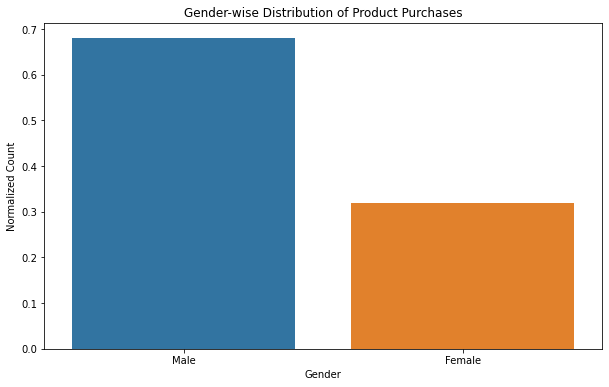

In [55]:
gender_count = df['gender'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Gender-wise Distribution of Product Purchases')
plt.xlabel('Gender')
plt.ylabel('Normalized Count')
plt.show()